In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
# from datetime import datetime, timedelta

In [2]:
zri = pd.read_csv('target.csv', index_col = 0,
                   parse_dates=['Time']
                  )

In [3]:
# zri = zri.dropna(subset=['zori_ssa','zori_ssa_diff'])

In [4]:
zri_one_month = zri.copy()
zri_one_month.loc[:,'Time'] = zri_one_month.loc[:,'Time'] + pd.DateOffset(months=12)

In [5]:
zri = zri.merge(zri_one_month, how='left', on = ['zip_code','Time'], 
         suffixes=(None,'_shift_one_month'))

In [6]:
zri

,zip_code,City,State,Time,zori_ssa,zori_ssa_diff,City_shift_one_month,State_shift_one_month,zori_ssa_shift_one_month,zori_ssa_diff_shift_one_month
0,77494,Houston,TX,2014-01-01,1390.0,NaN,NaN,NaN,NaN,NaN
1,77449,Houston,TX,2014-01-01,1202.0,NaN,NaN,NaN,NaN,NaN
2,77084,Houston,TX,2014-01-01,1058.0,NaN,NaN,NaN,NaN,NaN
3,79936,El Paso,TX,2014-01-01,887.0,NaN,NaN,NaN,NaN,NaN
4,78130,San Antonio,TX,2014-01-01,1118.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19560,76118,Dallas-Fort Worth,TX,2021-07-01,1737.0,197.0,Dallas-Fort Worth,TX,1672.0,197.0
19561,76247,Dallas-Fort Worth,TX,2021-07-01,1937.0,146.0,Dallas-Fort Worth,TX,1696.0,77.0
19562,78756,Austin,TX,2021-07-01,1547.0,-28.0,Austin,TX,1476.0,3.0
19563,78721,Austin,TX,2021-07-01,1807.0,345.0,Austin,TX,1631.0,265.0


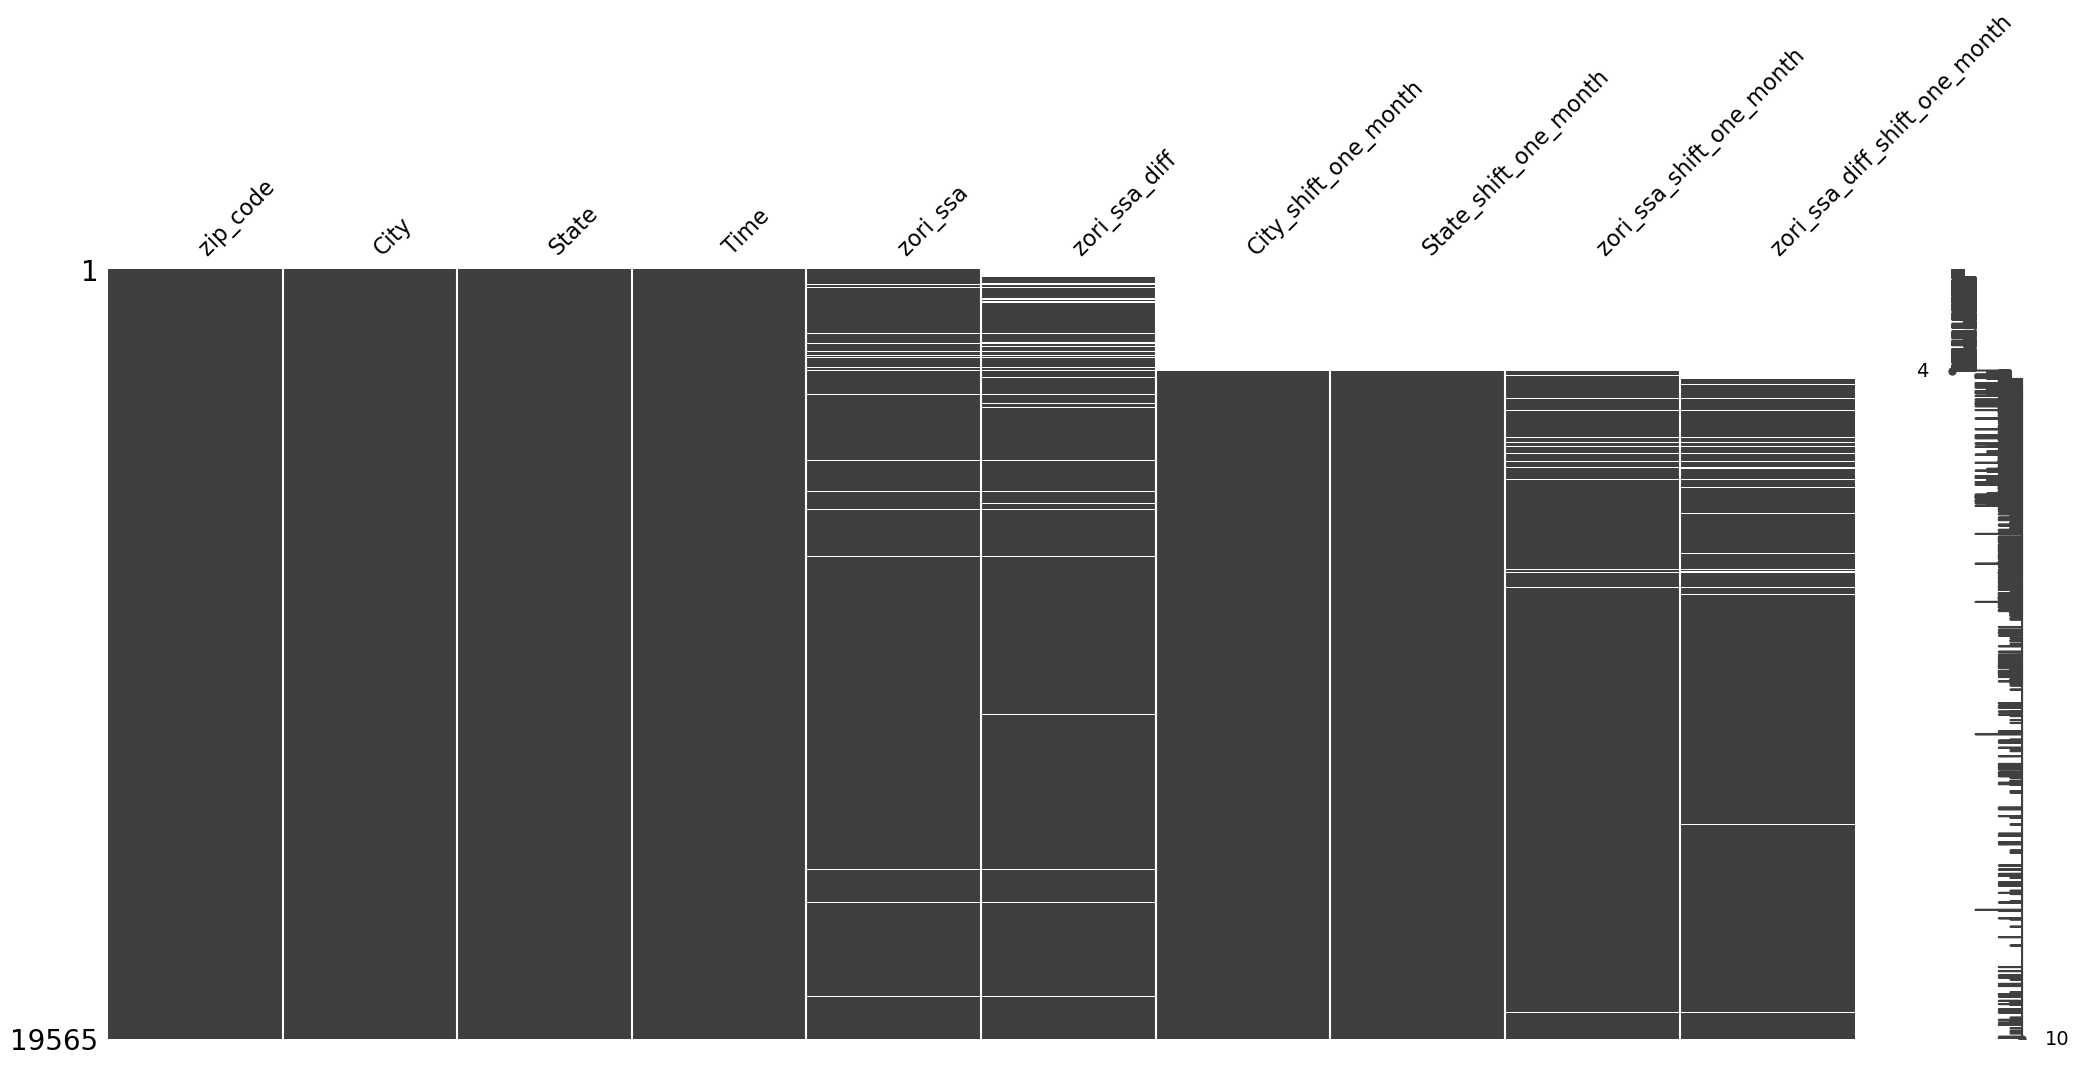

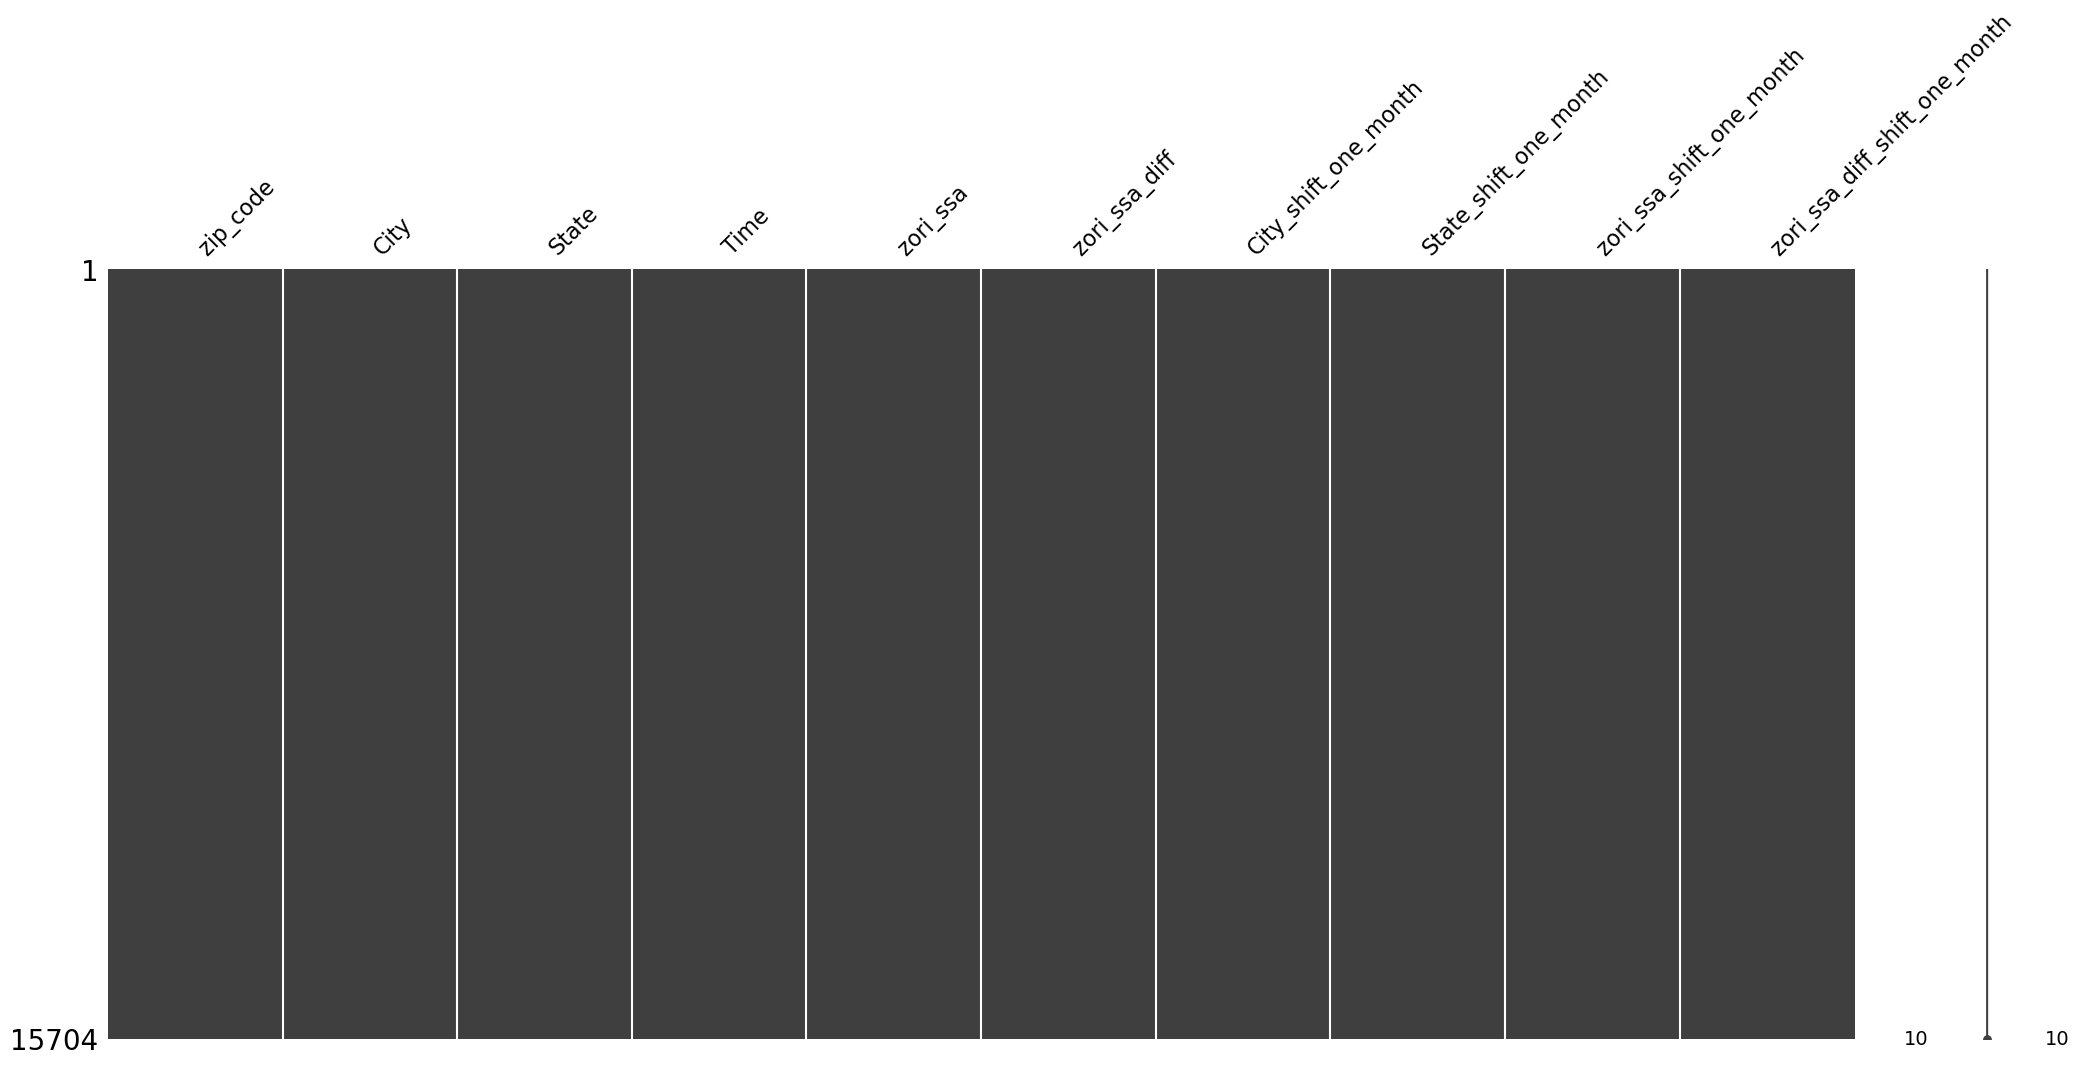

In [7]:
msno.matrix(zri)
plt.show()
msno.matrix(zri.dropna(subset=['zori_ssa','zori_ssa_diff',
                               'zori_ssa_shift_one_month','zori_ssa_diff_shift_one_month']))
plt.show()

In [8]:
zri = zri.dropna(subset=['zori_ssa','zori_ssa_diff',
                               'zori_ssa_shift_one_month','zori_ssa_diff_shift_one_month']).reset_index(drop=True)

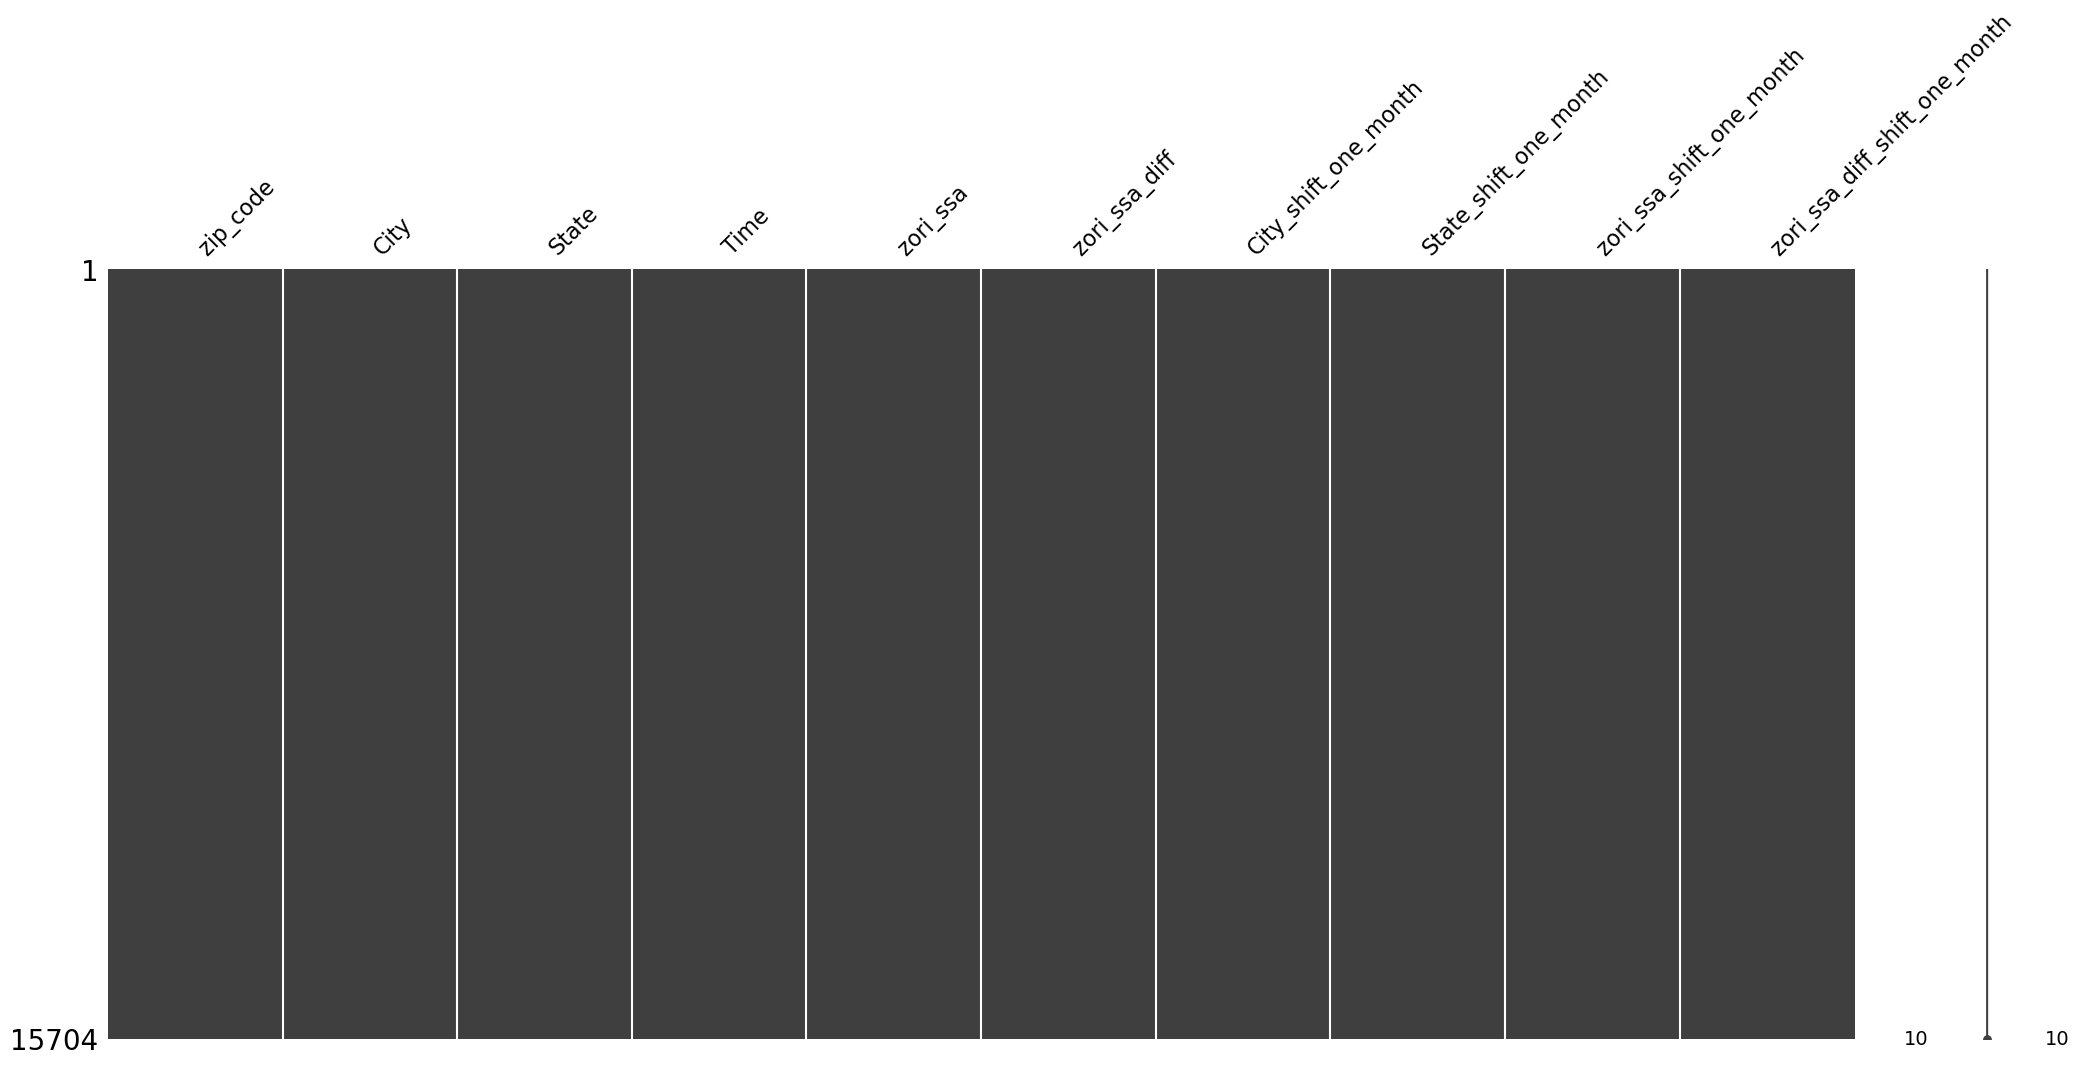

In [9]:
msno.matrix(zri)
plt.show()

In [10]:
zri[zri['zip_code']==78252]

,zip_code,City,State,Time,zori_ssa,zori_ssa_diff,City_shift_one_month,State_shift_one_month,zori_ssa_shift_one_month,zori_ssa_diff_shift_one_month
0,78252,San Antonio,TX,2015-01-01,1238.0,-11.0,San Antonio,TX,1224.0,22.0
141,78252,San Antonio,TX,2015-02-01,1244.0,-9.0,San Antonio,TX,1224.0,19.0
285,78252,San Antonio,TX,2015-03-01,1251.0,-6.0,San Antonio,TX,1224.0,15.0
432,78252,San Antonio,TX,2015-04-01,1257.0,-4.0,San Antonio,TX,1224.0,11.0
609,78252,San Antonio,TX,2015-05-01,1265.0,1.0,San Antonio,TX,1224.0,7.0
...,...,...,...,...,...,...,...,...,...,...
14859,78252,San Antonio,TX,2021-03-01,1545.0,37.0,San Antonio,TX,1459.0,75.0
15069,78252,San Antonio,TX,2021-04-01,1555.0,33.0,San Antonio,TX,1464.0,76.0
15280,78252,San Antonio,TX,2021-05-01,1565.0,28.0,San Antonio,TX,1468.0,73.0
15492,78252,San Antonio,TX,2021-06-01,1575.0,23.0,San Antonio,TX,1473.0,72.0


In [11]:
zri.shape

(15704, 10)

In [12]:
17843*.75

13382.25

In [13]:
zri.iloc

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
zri.columns

Index(['zip_code', 'City', 'State', 'Time', 'zori_ssa', 'zori_ssa_diff',
       'City_shift_one_month', 'State_shift_one_month',
       'zori_ssa_shift_one_month', 'zori_ssa_diff_shift_one_month'],
      dtype='object')

In [16]:
train = zri[zri['City']!='Houston']
test = zri[zri['City']=='Houston']

In [17]:
X_train = train['zori_ssa_shift_one_month']
y_train = train['zori_ssa']

X_test = test['zori_ssa_shift_one_month']
y_test = test['zori_ssa']

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [20]:
lm.score(X_train.values.reshape(-1, 1),y_train)

0.982729340244614

In [21]:
lm.score(X_test.values.reshape(-1, 1),y_test)

0.9522447269065342